<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0626_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_LDA%2CSVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LDA는 종속 변수와 무관하게 독립 변수의 추세를 보기 쉬운 축을 기준으로 하는 PCA와 다르게 클래스를 나누는 축을 이용한다는 차이점이 있음

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iris=load_iris()
data=iris.data
label=iris.target

In [10]:
ss=StandardScaler()
scaled_data=ss.fit_transform(data)

In [15]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda_data=lda.fit_transform(scaled_data,label)
print(scaled_data.shape,'->',lda_data.shape)

(150, 4) -> (150, 2)


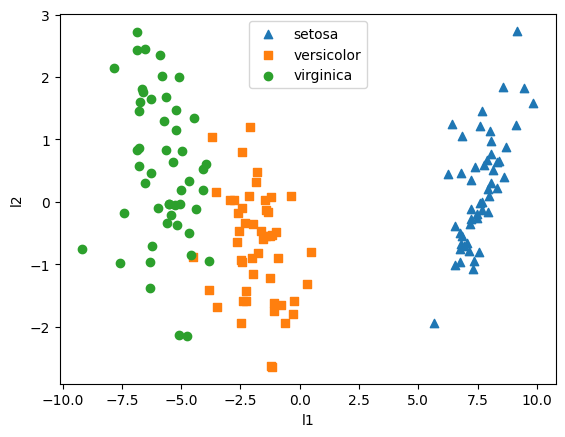

In [16]:
df = pd.DataFrame(lda_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['label']==i #품종별로 필터링
  df_i = df[f_i] #특정 품종만 추출
  x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
  y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [22]:
rfc=RandomForestClassifier()
s=cross_val_score(rfc,lda_data,label,scoring='accuracy',cv=5)
print('정확도;',s)
print('평균:',s.mean())

정확도; [1.         1.         0.9        0.93333333 1.        ]
평균: 0.9666666666666666


# SVD

In [23]:
from numpy.linalg import svd

In [27]:
for _ in range(4):
    np.random.seed(121) #랜덤 발생을 위한 씨앗 값 설정
    for _ in range(10):
        print(np.random.randint(1,10),end=' ')
    print()

3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 
3 6 9 5 2 5 4 1 3 5 


In [49]:
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [50]:
u,sigma,vt=svd(a)
print(a.shape,'->',u.shape,sigma.shape,vt.shape)
print(u,sigma,vt)

(4, 4) -> (4, 4) (4,) (4, 4)
[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]] [3.4229581  2.02287339 0.46263157 0.07935069] [[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [51]:
sm=np.diag(sigma)
print(np.round(sm,3))

[[3.423 0.    0.    0.   ]
 [0.    2.023 0.    0.   ]
 [0.    0.    0.463 0.   ]
 [0.    0.    0.    0.079]]


In [52]:
a_=np.dot(np.dot(u,sm),vt)
print(np.round(a_,3))
print(a,3)

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]] 3


In [53]:
from sklearn.decomposition import TruncatedSVD

In [55]:
tsvd=TruncatedSVD(n_components=2)

In [56]:
iris=load_iris()
data=iris.data
label=iris.target
tsvd=TruncatedSVD(n_components=2)
tsvd_data=tsvd.fit_transform(data)

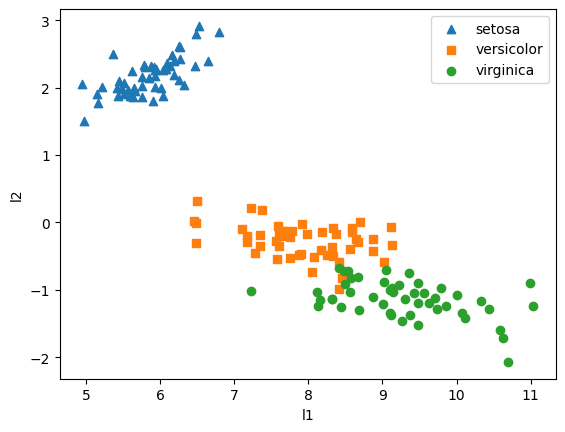

In [57]:
df = pd.DataFrame(tsvd_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['label']==i #품종별로 필터링
  df_i = df[f_i] #특정 품종만 추출
  x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
  y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [58]:
rfc=RandomForestClassifier()
s=cross_val_score(rfc,tsvd_data,label,scoring='accuracy',cv=5)
print('정확도;',s)
print('평균:',s.mean())

정확도; [1.         0.96666667 0.96666667 0.96666667 1.        ]
평균: 0.9800000000000001


In [59]:
from sklearn.decomposition import PCA

In [60]:
ss = StandardScaler()
sd = ss.fit_transform(data)
tsvd = TruncatedSVD(n_components=2)
tsvd_data = tsvd.fit_transform(sd)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sd)

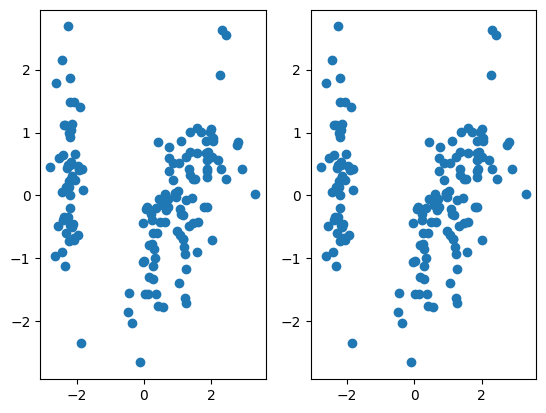

In [61]:
_,axes = plt.subplots(ncols=2)
df1 = pd.DataFrame(tsvd_data,columns=['l1','l2'])
x_data = df1['l1'] #p1컬럼 을 x 데이터로 설정
y_data = df1['l2'] #p2 컬럼을 y 데이터로 설정
axes[0].scatter(x_data,y_data,marker='o')

df2 = pd.DataFrame(pca_data,columns=['l1','l2'])
x_data = df2['l1'] #p1컬럼 을 x 데이터로 설정
y_data = df2['l2'] #p2 컬럼을 y 데이터로 설정
axes[1].scatter(x_data,y_data,marker='o')

plt.show()